# 0.0. Planejamento

###  Input
**Problema**: 

### Output

### Tasks

# 1.0. Imports

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## 1.1. Helper Functions

In [76]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display(HTML('<style>.container{width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 1.2. Data

In [77]:
data = pd.read_csv('../data/Train_rev1.csv')

In [78]:
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


# 2.0. Data Description

In [79]:
df2 = data.copy()

## 2.1. Shape Data

In [80]:
print(f'Rows: {df2.shape[0]}')
print(f'Columns: {df2.shape[1]}')

Rows: 244768
Columns: 12


## 2.2. Data Types

In [81]:
len(df2.loc[df2['FullDescription'].str.contains('Permanent'), 'FullDescription'])

11417

In [82]:
df2.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

## 2.3. Check Na

### Notas:
#### Ciclo 1:
* Dropar Linhas:
    * Title
    * SourceName
    * Company
    * ContractTime   
    
    <br>
    
* Dropar Coluna:
    * Contract Type
    
#### Analisar:
* ContractType
* ContractTime
* Company

In [84]:
tot_na = df2.isnull().sum()
percentage_na = round(df2.isnull().mean(), 4) * 100

# dataframe of na
pd.DataFrame([tot_na, percentage_na], index=['Total', 'Percentual']).T

,Total,Percentual
Id,0.0,0.00
Title,1.0,0.00
FullDescription,0.0,0.00
LocationRaw,0.0,0.00
LocationNormalized,0.0,0.00
ContractType,179326.0,73.26
ContractTime,63905.0,26.11
Company,32430.0,13.25
Category,0.0,0.00
SalaryRaw,0.0,0.00


## 2.4. Pre-Analysis

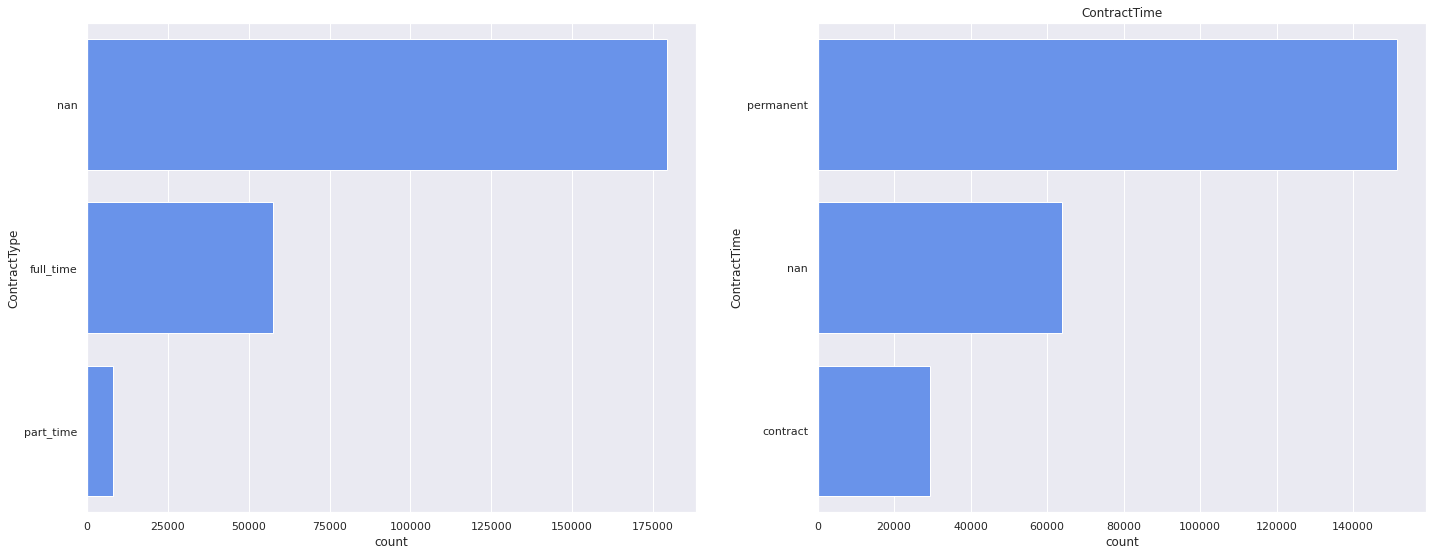

In [85]:
# Plotando colunas com poucos valores
columns = ['ContractType', 'ContractTime']

fig, ax = plt.subplots(1, 2)

for i, val in enumerate(columns):
    sns.countplot(y = df2[val].astype('str'), color='#548CFF', ax=ax[i])
    plt.title(val)

# 3.0. Variable Filtering
### Colunas Retiradas:
- Id
- LocationRaw
- SalaryRaw

In [123]:
df3 = df2.copy()

In [124]:
df3.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [125]:
df3.drop(['Id', 'LocationRaw', 'SalaryRaw', 'Title', 'FullDescription', 'SourceName', 'Company', 'LocationNormalized'], axis=1, inplace=True)

# 4.0. Feature Engineering

In [126]:
df4 = df3.copy()

# 5.0. Exploratory Data Analysis

In [127]:
df5 = df4.copy()

# 6.0. Data Preparation

In [128]:
X = df5.drop('SalaryNormalized', axis=1)
y = df5['SalaryNormalized']

## 6.1. NA Values

## 6.1. Train Test Split

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.2. Na Values

In [230]:
X_train.isnull().sum()

ContractType    143245
ContractTime     51332
Category             0
dtype: int64

In [231]:
X_train.loc[X_train['ContractType'].isnull(), 'ContractType'] = 'null'
X_train.loc[X_train['ContractTime'].isnull(), 'ContractTime'] = 'null'

In [232]:
X_test.loc[X_test['ContractType'].isnull(), 'ContractType'] = 'null'
X_test.loc[X_test['ContractTime'].isnull(), 'ContractTime'] = 'null'

## 6.3. Categorical

### 6.3.1. One Hot Encoder

In [236]:
trf2 = ColumnTransformer(transformers =[
    ('enc', OneHotEncoder(sparse = False, drop ='first'), list(range(3))),
], remainder ='passthrough')

In [237]:
X_train = pd.DataFrame(trf2.fit_transform(X_train))
X_test = pd.DataFrame(trf2.fit_transform(X_test))

# 7.0. Feature Selection

# 8.0. Machine Learning Pipeline

## 8.1. Baseline - Mean

In [240]:
# fit
y_mean = y_train.mean()

# predict
y_hat = np.repeat(y_mean, len(y_test))

# avaliation
mean_absolute_error(y_test, y_hat)

13384.971608238053

In [241]:
errors = y_test - y_hat

<AxesSubplot:>

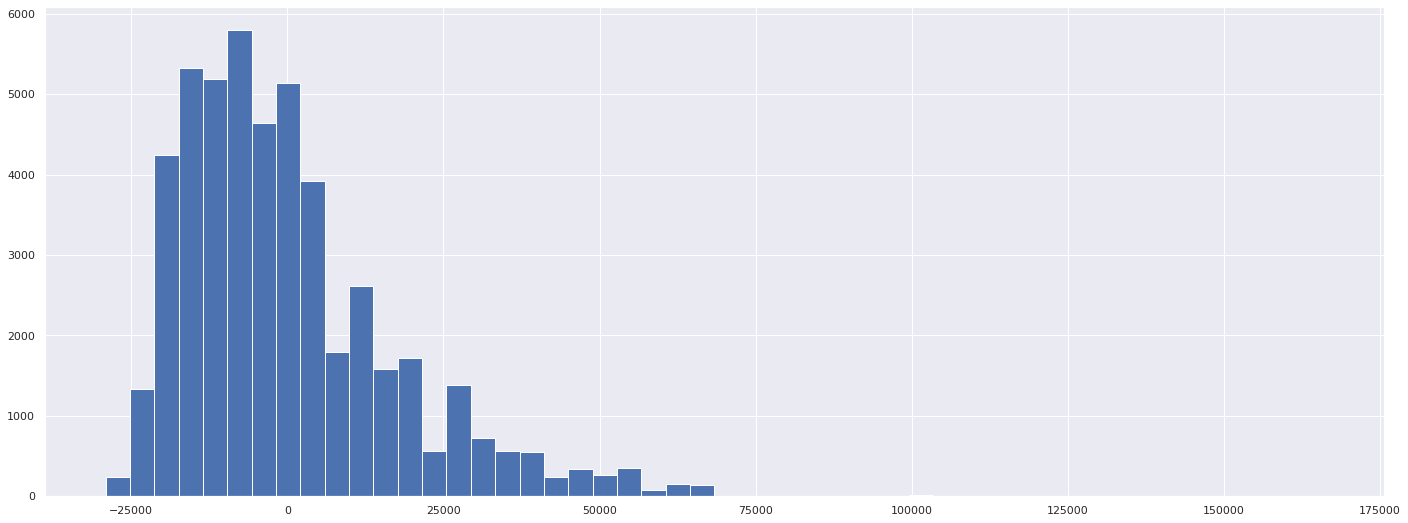

In [242]:
errors.hist(bins=50)

## 8.2. Linear Regression

In [244]:
lr = LinearRegression()

# cross_validate
results = cross_validate(lr, X_train, y_train, scoring=['neg_mean_absolute_error'], cv=10)

# result
np.mean(results['test_neg_mean_absolute_error'] * -1)

11970.3965683765

## 8.3. RandomForestRegressor

In [249]:
rf = RandomForestRegressor()

# cross_validate
results = cross_validate(rf, X_train, y_train, scoring=['neg_mean_absolute_error'], cv=3)

# result
np.mean(results['test_neg_mean_absolute_error'] * -1)

11125.191842539332

# 9.0. Performance

In [250]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)

In [251]:
mean_absolute_error(y_test, y_hat)

11112.958435253871

# 10.0. Deploy